In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
open('Book1.csv')
log=pd.read_csv('Book1.csv')

In [3]:
# consumerKey='********W'
# consumerSecret='**********H'
# accessToken='***********R'
# accessTokenSecret='**********t'

consumerKey=log['key'][0]
consumerSecret=log['key'][1]
accessToken=log['key'][2]
accessTokenSecret=log['key'][3]

In [4]:
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)

In [5]:
authenticate.set_access_token(accessToken, accessTokenSecret)

In [6]:
api=tweepy.API(authenticate, wait_on_rate_limit = True)

In [7]:
p=api.user_timeline(screen_name="BillGates", count=100, tweet_mode="extended")
print(p)

[Status(_api=<tweepy.api.API object at 0x0000017957495F90>, _json={'created_at': 'Sat Nov 19 19:24:57 +0000 2022', 'id': 1594049106615291907, 'id_str': '1594049106615291907', 'full_text': 'In order to solve our world’s sanitation crisis, we need smarter toilets that don’t rely on sewage systems and prevent the spread of diseases. #WorldToiletDay https://t.co/gbp9F0GxlE', 'truncated': False, 'display_text_range': [0, 182], 'entities': {'hashtags': [{'text': 'WorldToiletDay', 'indices': [143, 158]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/gbp9F0GxlE', 'expanded_url': 'https://gatesnot.es/3ELri81', 'display_url': 'gatesnot.es/3ELri81', 'indices': [159, 182]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 50393960, 'id_str': '50393960', 'name': 'Bil

In [8]:
print("Show the 5 recent tweets: \n")
i=1
for tweet in p[0:5]:
    print(str(i) +') ' + tweet.full_text +  '\n')
    i=i+1

Show the 5 recent tweets: 

1) In order to solve our world’s sanitation crisis, we need smarter toilets that don’t rely on sewage systems and prevent the spread of diseases. #WorldToiletDay https://t.co/gbp9F0GxlE

2) Collaboration and more open access to data have made seemingly impossible health breakthroughs a reality, like COVID-19 vaccines. @AlzData is putting the power of data behind one of our most critical health challenges. https://t.co/Qtatf2WMds

3) From decreasing maternal mortality to lowering rates of vaccine-preventable diseases, @WendoAszed is a true hero in her community. https://t.co/tuAz440QNx

4) Africa has always been at the heart of our foundation’s mission. Today, we are announcing our commitment of $7 billion over the next 4 years for the development of more breakthrough innovations in health and agriculture across the continent. https://t.co/imh57I2hdg

5) @Amref_Worldwide is doing great things for health within Kenya and across Africa thanks to the leadership 

In [9]:
df=pd.DataFrame([tweet.full_text for tweet in p], columns=['Tweets'])
df.head()

,Tweets
0,In order to solve our world’s sanitation crisi...
1,Collaboration and more open access to data hav...
2,From decreasing maternal mortality to lowering...
3,Africa has always been at the heart of our fou...
4,@Amref_Worldwide is doing great things for hea...


In [10]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'https?:\/\/\S+', '',text)
    
    return text

df['Tweets']=df['Tweets'].apply(cleanTxt)

df

,Tweets
0,In order to solve our world’s sanitation crisi...
1,Collaboration and more open access to data hav...
2,From decreasing maternal mortality to lowering...
3,Africa has always been at the heart of our fou...
4,_Worldwide is doing great things for health wi...
...,...
95,There are so many reasons to be hopeful. Innov...
96,This is great. New Jersey is setting a new sta...
97,Pneumonia is the leading cause of death in chi...
98,"I feel honored to have met HM Queen Elizabeth,..."


In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df


,Tweets,Subjectivity,Polarity
0,In order to solve our world’s sanitation crisi...,0.000000,0.000000
1,Collaboration and more open access to data hav...,0.666667,-0.011111
2,From decreasing maternal mortality to lowering...,0.650000,0.350000
3,Africa has always been at the heart of our fou...,0.250000,0.250000
4,_Worldwide is doing great things for health wi...,0.475000,0.500000
...,...,...,...
95,There are so many reasons to be hopeful. Innov...,0.500000,0.500000
96,This is great. New Jersey is setting a new sta...,0.431818,0.214545
97,Pneumonia is the leading cause of death in chi...,0.000000,0.000000
98,"I feel honored to have met HM Queen Elizabeth,...",0.500000,-0.325000


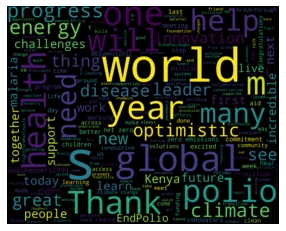

In [12]:
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width=2500, height=2000, random_state=21, max_font_size=500).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,In order to solve our world’s sanitation crisi...,0.000000,0.000000,Neutral
1,Collaboration and more open access to data hav...,0.666667,-0.011111,Negative
2,From decreasing maternal mortality to lowering...,0.650000,0.350000,Positive
3,Africa has always been at the heart of our fou...,0.250000,0.250000,Positive
4,_Worldwide is doing great things for health wi...,0.475000,0.500000,Positive
...,...,...,...,...
95,There are so many reasons to be hopeful. Innov...,0.500000,0.500000,Positive
96,This is great. New Jersey is setting a new sta...,0.431818,0.214545,Positive
97,Pneumonia is the leading cause of death in chi...,0.000000,0.000000,Neutral
98,"I feel honored to have met HM Queen Elizabeth,...",0.500000,-0.325000,Negative


In [14]:
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='Positive':
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j=j+1

1) From decreasing maternal mortality to lowering rates of vaccine-preventable diseases,  is a true hero in her community. 

2) Africa has always been at the heart of our foundation’s mission. Today, we are announcing our commitment of $7 billion over the next 4 years for the development of more breakthrough innovations in health and agriculture across the continent. 

3) _Worldwide is doing great things for health within Kenya and across Africa thanks to the leadership of . It was a pleasure to meet with you. 

4) Many people don’t know that Mike was a champion for and leader on PEPFAR – the President’s Emergency Plan for AIDS Relief – which has saved millions of lives. It’s one of the best things this country has ever done. It will be a lasting part of his legacy.

5) I’m very sad to hear about Michael Gerson’s passing. We spoke many times over the years, especially about global health, and when I started talking about pandemic prevention back in 2015, he was one of the first journal

In [15]:
j=1
sortedDF=df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='Negative':
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j=j+1

1) Collaboration and more open access to data have made seemingly impossible health breakthroughs a reality, like COVID-19 vaccines.  is putting the power of data behind one of our most critical health challenges. 

2) I have never met anyone who was more passionate about reducing the world’s worst inequities in health than Paul Farmer. I continue to learn from my dear friend’s life and legacy today. 

3)   It’s unrealistic to expect people to stop traveling by plane. We must scale innovations that decarbonize the aviation industry.  will help us achieve this by building the world’s first plant for turning alcohol into sustainable aviation fuel. 

4) Last week, I sat down with Bloomberg  to talk about why I remain so committed to eradicating polio. By coming together and funding efforts like the Global Polio Eradication Initiative, we can EndPolio and build a healthier world. 

5) The world can end this pandemic while also preventing the next. As  shares, "such changes seem unrealistic

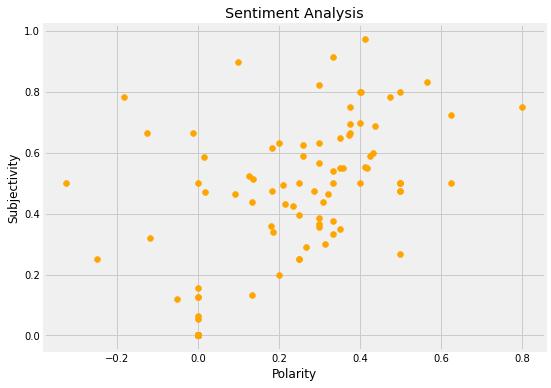

In [16]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Orange')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [17]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0]) *100, 1)

69.0

In [18]:
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100,1)

7.0

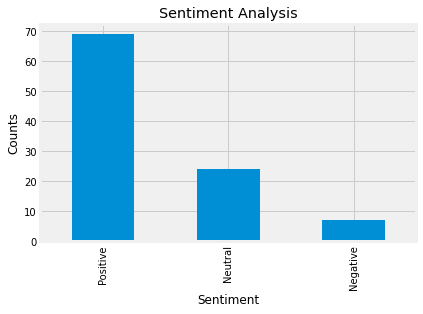

In [19]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()